In [40]:
import numpy as np
import tensorflow as tf
import math
from matplotlib import pyplot as plt
from urllib import request
from sklearn.metrics import ConfusionMatrixDisplay

## MNIST

### Carga base de datos

In [2]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


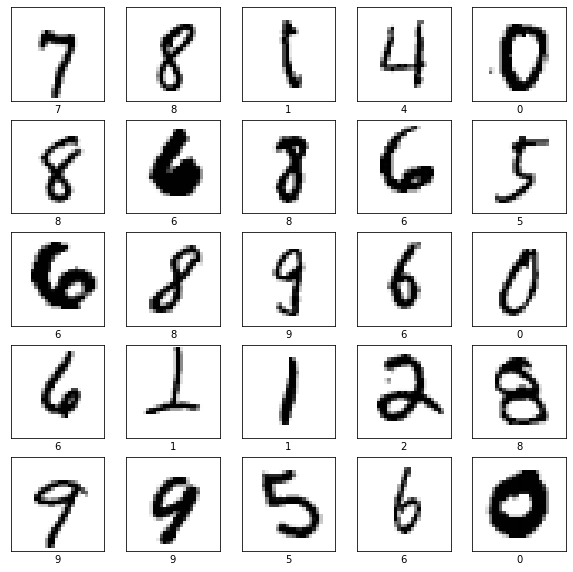

In [3]:
plt.figure(figsize = (10 , 10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  img_index = np.random.randint(0, train_images.shape[0])
  plt.imshow(train_images[img_index], cmap = "gray_r")
  plt.xlabel(train_labels[img_index])

### Normalizacion de datos

In [4]:
max(train_labels)

9

In [5]:
std_train = train_images.std(axis = 0)
std_train[std_train == 0] = 1

std_test = test_images.std(axis = 0)
std_test[std_test == 0] = 1

In [6]:
train_images_normalized = (train_images - train_images.mean(axis=0))/std_train
test_images_normalized = (test_images - test_images.mean(axis=0))/std_test

In [7]:
X_train = train_images_normalized.reshape(train_images_normalized.shape[0], 28 * 28) 
X_test = test_images_normalized.reshape(test_images_normalized.shape[0], 28 * 28) 

### Entrenamiento modelo

In [8]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10, input_dim=28 * 28))
es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=1)
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1),loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics = ['accuracy'])
hist = model.fit(x=X_train, y=train_labels, batch_size = 60000, epochs=3000,callbacks=[es])

Se han truncado las últimas 5000 líneas del flujo de salida.
1/1 [==============================] - 0s 137ms/step - loss: 0.2326 - accuracy: 0.9359
Epoch 502/3000
1/1 [==============================] - 0s 121ms/step - loss: 0.2326 - accuracy: 0.9359
Epoch 503/3000
1/1 [==============================] - 0s 79ms/step - loss: 0.2326 - accuracy: 0.9359
Epoch 504/3000
1/1 [==============================] - 0s 78ms/step - loss: 0.2325 - accuracy: 0.9359
Epoch 505/3000
1/1 [==============================] - 0s 105ms/step - loss: 0.2325 - accuracy: 0.9359
Epoch 506/3000
1/1 [==============================] - 0s 94ms/step - loss: 0.2325 - accuracy: 0.9359
Epoch 507/3000
1/1 [==============================] - 0s 97ms/step - loss: 0.2324 - accuracy: 0.9359
Epoch 508/3000
1/1 [==============================] - 0s 147ms/step - loss: 0.2324 - accuracy: 0.9360
Epoch 509/3000
1/1 [==============================] - 0s 199ms/step - loss: 0.2324 - accuracy: 0.9360
Epoch 510/3000
1/1 [====================

In [9]:
y_pred = np.argmax(model.predict(x=X_test), axis = 1)
accuracy = (y_pred == test_labels).mean()

313/313 [==============================] - 0s 1ms/step


### Confusion matrix




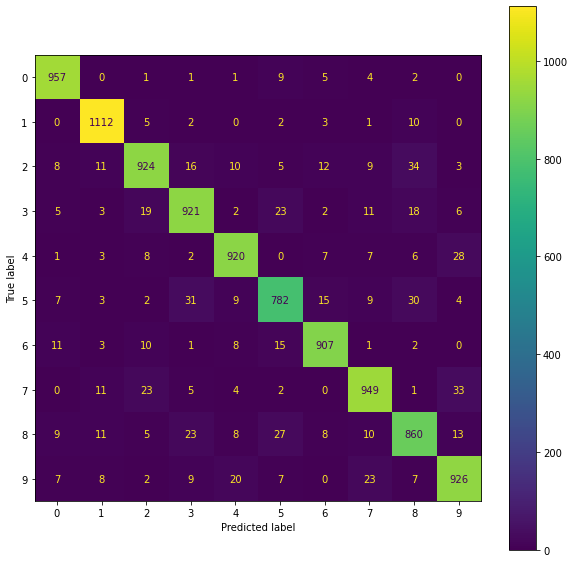

In [10]:
fig, ax = plt.subplots(1, 1, figsize = (10, 10))
ConfusionMatrixDisplay.from_predictions(test_labels, y_pred, ax = ax)

## FASHION-MNIST

### Carga base de datos

In [11]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


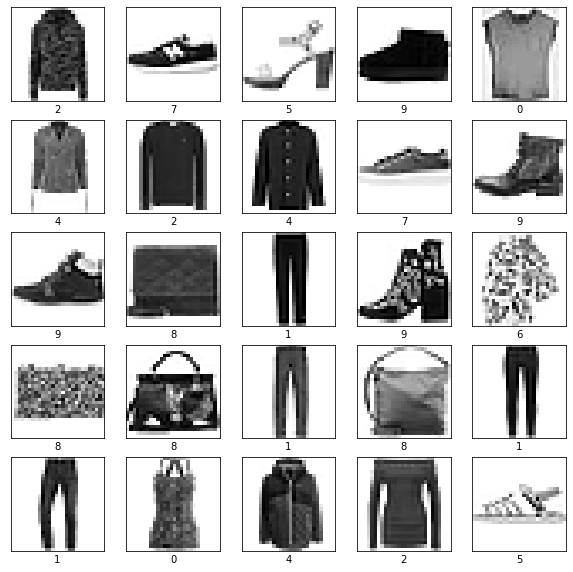

In [12]:
plt.figure(figsize = (10 , 10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  img_index = np.random.randint(0, train_images.shape[0])
  plt.imshow(train_images[img_index], cmap = "gray_r")
  plt.xlabel(train_labels[img_index])

### Normalizacion de datos

In [13]:
max(train_labels)

9

In [14]:
std_train = train_images.std(axis = 0)
std_train[std_train == 0] = 1

std_test = test_images.std(axis = 0)
std_test[std_test == 0] = 1

In [15]:
train_images_normalized = (train_images - train_images.mean(axis=0))/std_train
test_images_normalized = (test_images - test_images.mean(axis=0))/std_test

In [16]:
X_train = train_images_normalized.reshape(train_images_normalized.shape[0], 28 * 28) 
X_test = test_images_normalized.reshape(test_images_normalized.shape[0], 28 * 28) 

### Entrenamiento modelo

In [17]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10, input_dim=28 * 28))
es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=1)
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics = ['accuracy'])
hist = model.fit(x=X_train, y=train_labels, batch_size = 60000, epochs=3000,callbacks=[es])

Se han truncado las últimas 5000 líneas del flujo de salida.
1/1 [==============================] - 0s 87ms/step - loss: 0.4179 - accuracy: 0.8577
Epoch 502/3000
1/1 [==============================] - 0s 83ms/step - loss: 0.4178 - accuracy: 0.8578
Epoch 503/3000
1/1 [==============================] - 0s 91ms/step - loss: 0.4177 - accuracy: 0.8578
Epoch 504/3000
1/1 [==============================] - 0s 82ms/step - loss: 0.4176 - accuracy: 0.8578
Epoch 505/3000
1/1 [==============================] - 0s 88ms/step - loss: 0.4176 - accuracy: 0.8578
Epoch 506/3000
1/1 [==============================] - 0s 90ms/step - loss: 0.4175 - accuracy: 0.8579
Epoch 507/3000
1/1 [==============================] - 0s 88ms/step - loss: 0.4174 - accuracy: 0.8579
Epoch 508/3000
1/1 [==============================] - 0s 82ms/step - loss: 0.4174 - accuracy: 0.8579
Epoch 509/3000
1/1 [==============================] - 0s 81ms/step - loss: 0.4173 - accuracy: 0.8579
Epoch 510/3000
1/1 [=========================

In [18]:
y_pred = np.argmax(model.predict(x=X_test), axis = 1)
accuracy = (y_pred == test_labels).mean()

313/313 [==============================] - 0s 1ms/step


### Confusion matrix




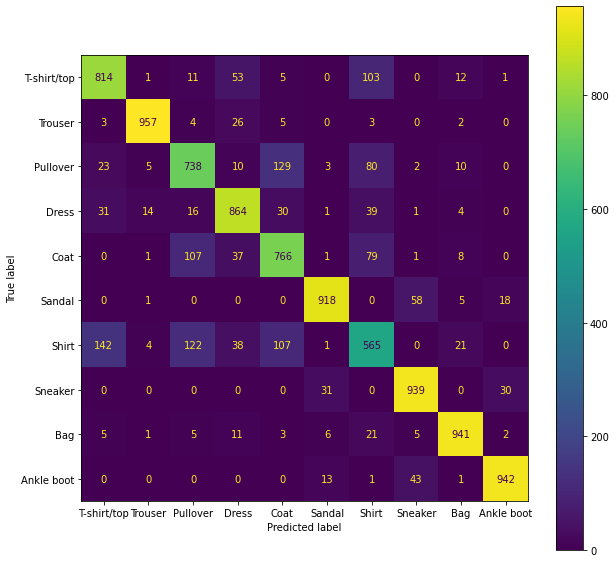

In [19]:
fig, ax = plt.subplots(1, 1, figsize = (10, 10))
labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
ConfusionMatrixDisplay.from_predictions(test_labels, y_pred, display_labels = labels, ax = ax)

## PCA MNIST

### Parte 1

In [130]:
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()

In [42]:
from sklearn import decomposition

X0 = X_train - np.mean(X_train, axis = 0) ## normalizo
X0 = X0.reshape(X0.shape[0], 28 * 28)
n, dx=np.shape(X0)

In [43]:
pca = decomposition.PCA(n_components = dx)
pca.fit(X0)
U = pca.transform(X0)
ave = pca.components_
ava = pca.explained_variance_

ECM = []
for dim in range(1, dx + 1):
  U = X0 @ ave[:,:dim]
  Xh = U @ ave[:,:dim].T
  ECM_iter = np.sum((X0-Xh)**2)/n
  ECM.append(ECM_iter)

Grafico el ECM y el porcentaje de energía

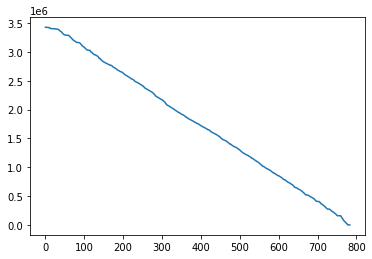

In [44]:
plt.plot(ECM)
plt.show()

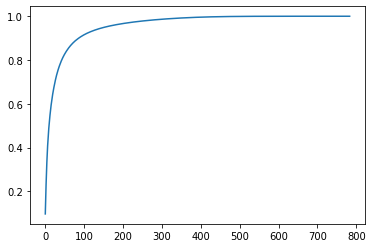

In [45]:
energia = []
for i in range(1, len(ava) + 1):
  energia.append(sum(ava[:i]) / sum(ava))
plt.plot(energia)
plt.show()

### Parte 2

In [86]:
pca = decomposition.PCA(n_components=50)
pca.fit(X0)
U = pca.transform(X0) 
Xh = pca.inverse_transform(U)
print('AVES', pca.components_) 
print('AVAS', pca.explained_variance_) 
print('AVAS normalizados', pca.explained_variance_ratio_) 
print('ECM', np.sum((X0-Xh)**2)/n)

AVES [[ 1.10479001e-17 -7.02238822e-18  2.25616857e-20 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 1.18842353e-16 -5.30976597e-17 -1.29659746e-18 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-1.31805354e-17 -8.04129257e-17 -3.56843680e-18 ... -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]
 ...
 [-3.13755593e-17 -5.06004325e-18  1.47341971e-17 ... -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]
 [ 6.99354376e-18  2.20511845e-17 -1.18665503e-17 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 2.92452014e-17 -6.58400783e-18  7.70794735e-18 ... -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]]
AVAS [332724.66744657 243283.9390705  211507.36705827 184776.38586219
 166926.83131066 147844.96167532 112178.20271178  98874.42962709
  94696.24905304  80809.82453195  72313.62025957  69358.30132665
  58826.87114945  58014.0840167   54123.75694877  50843.06852693
  45412.60630564  43778.45913126  40705.34045295  39519.79037791
  36553.53584422  34515.19387

Elijo 50 componentes principales

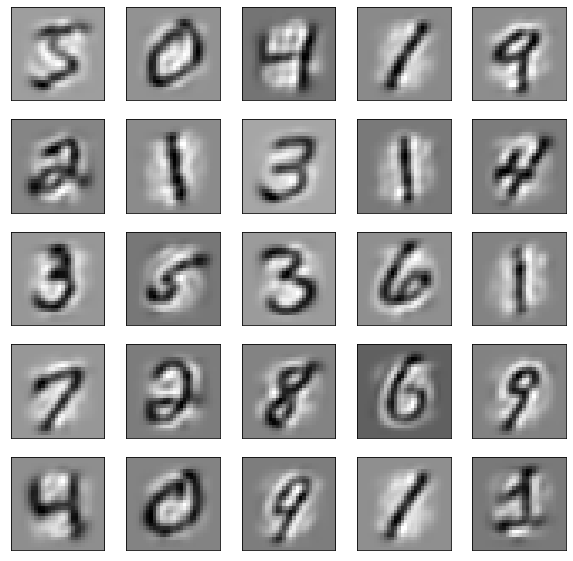

In [88]:
Xh = Xh.reshape(Xh.shape[0], 28, 28)

plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(Xh[i], cmap="gray_r")

### Parte 3

Comienzo guardando los valores mínimos y máximos y luego encuentro los valores intermedios

In [141]:
min_comp_1 = min(U[0])
min_comp_2 = min(U[1])
max_comp_1 = max(U[0])
max_comp_2 = max(U[1])
print(min_comp_1, min_comp_2, max_comp_1, max_comp_2)

-11.721092637209905 -9.304667534869385 9.273385250254917 10.769968017717764


In [142]:
lista_comp_1 = np.linspace(min_comp_1, max_comp_1, 10)
lista_comp_2 = np.linspace(min_comp_2, max_comp_2, 10)
x, y = np.meshgrid(lista_comp_1, lista_comp_2)

##plt.imshow(x, y) preguntar como reconstruir imagen

### Parte 4

Armo la database

In [131]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

media = np.mean(train_images,axis=0)
desvio = np.std(train_images,axis=0)

train_images = (train_images - media)/desvio
test_images = (test_images - media)/desvio
X_test = (X_test - media)/desvio

database_images = np.concatenate((X_test, test_images))
database_images = database_images.reshape(database_images.shape[0], 28 * 28)
database_labels = np.concatenate((Y_test, test_labels))

Entreno PCA y reconstruyo la database

In [132]:
pca = decomposition.PCA(n_components=50)
pca.fit(database_images)
U = pca.transform(database_images) 
Xh = pca.inverse_transform(U)

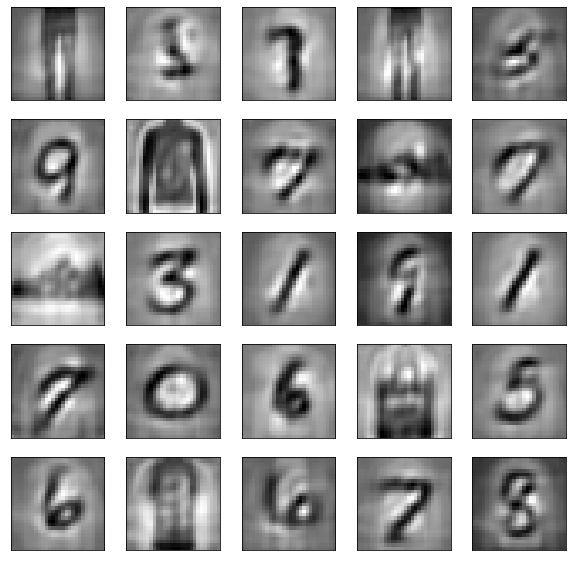

In [140]:
Xh = Xh.reshape(Xh.shape[0], 28, 28)

plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(Xh[np.random.randint(0, Xh.shape[0])], cmap="gray_r")

Calculo el ECM

In [133]:
ecm = np.sum((database_images - Xh)**2 / (Xh.shape[1]), axis = 1)
ecm = ecm.reshape((20000, 1))

Defino la curva ROC

In [134]:
def rates(ecm, umbral_start, umbral_stop, umbral_step):
  TPR = []
  FPR = []
  TNR = []
  FNR = []

  mask = np.full((20000), True)
  mask[10000:] = False
  mask = mask.reshape(20000, 1)

  for i in np.arange(umbral_start, umbral_stop, umbral_step):
    TP = np.sum((ecm < i) & (mask == False))
    FP = np.sum((ecm < i) & mask)
    TN = np.sum((ecm >= i) & mask)
    FN = np.sum((ecm >= i) & (mask == False))

    TPR.append(TP / (TP + FN))
    TNR.append(TN / (TN + FP))
    FPR.append(FP / (FP + TN))
    FNR.append(FN / (FN + TP))
    
  return TPR, FPR, TNR, FNR

In [135]:
TPR, FPR, TNR, FNR = rates(ecm, min(ecm), max(ecm), 0.01)

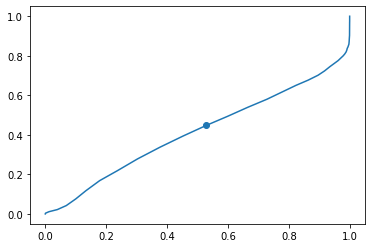

In [138]:
plt.plot(FPR, TPR)
plt.scatter(FPR[np.argmin(np.absolute((np.array(FNR) - np.array(FPR))))], TPR[np.argmin(np.absolute((np.array(FNR) - np.array(FPR))))])
plt.show()

In [139]:
EER = FPR[np.argmin(np.absolute((np.array(FNR) - np.array(FPR))))]
EER

0.5284